# GRIP : The Sparks Foundation

# Data Science and Business Analytics Intern

## Task-6 - Prediction using Decision Tree Algorithm - IRIS DataSet

## Author: Abhijeet Rajwade

#### Problem Statement - 

##### The purpose is if we feed any new data to this classifier, it would be able to predict theright class accordingly

##### Importing the Python Libraries 

In [1]:
import sklearn.datasets as data
import pandas as pd

##### Importing datasets 

In [2]:
iris = data.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [10]:
Y =iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

##### Using train and test ...sklearn model selection  

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,Y, test_size=0.33,random_state=30)

In [13]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
6,4.6,3.4,1.4,0.3
67,5.8,2.7,4.1,1.0
144,6.7,3.3,5.7,2.5
92,5.8,2.6,4.0,1.2
21,5.1,3.7,1.5,0.4
...,...,...,...,...
53,5.5,2.3,4.0,1.3
130,7.4,2.8,6.1,1.9
140,6.7,3.1,5.6,2.4
45,4.8,3.0,1.4,0.3


In [14]:
y_train

array([0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2,
       0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0,
       0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2,
       2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 0])

In [15]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
20,5.4,3.4,1.7,0.2
5,5.4,3.9,1.7,0.4
3,4.6,3.1,1.5,0.2
101,5.8,2.7,5.1,1.9
82,5.8,2.7,3.9,1.2
80,5.5,2.4,3.8,1.1
123,6.3,2.7,4.9,1.8
145,6.7,3.0,5.2,2.3
74,6.4,2.9,4.3,1.3
107,7.3,2.9,6.3,1.8


In [16]:
y_test

array([0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       0, 0, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1,
       2, 1, 1, 1, 1, 1])

##### Defining the Decision Tree Algorithm 

In [17]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train,y_train)

print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [18]:
y_predict = decision.predict(X_test)

##### Creating Confusion Matrix 

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[13,  0,  0],
       [ 0, 14,  4],
       [ 0,  1, 18]], dtype=int64)

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

##### Visualizing the Decision Tree 

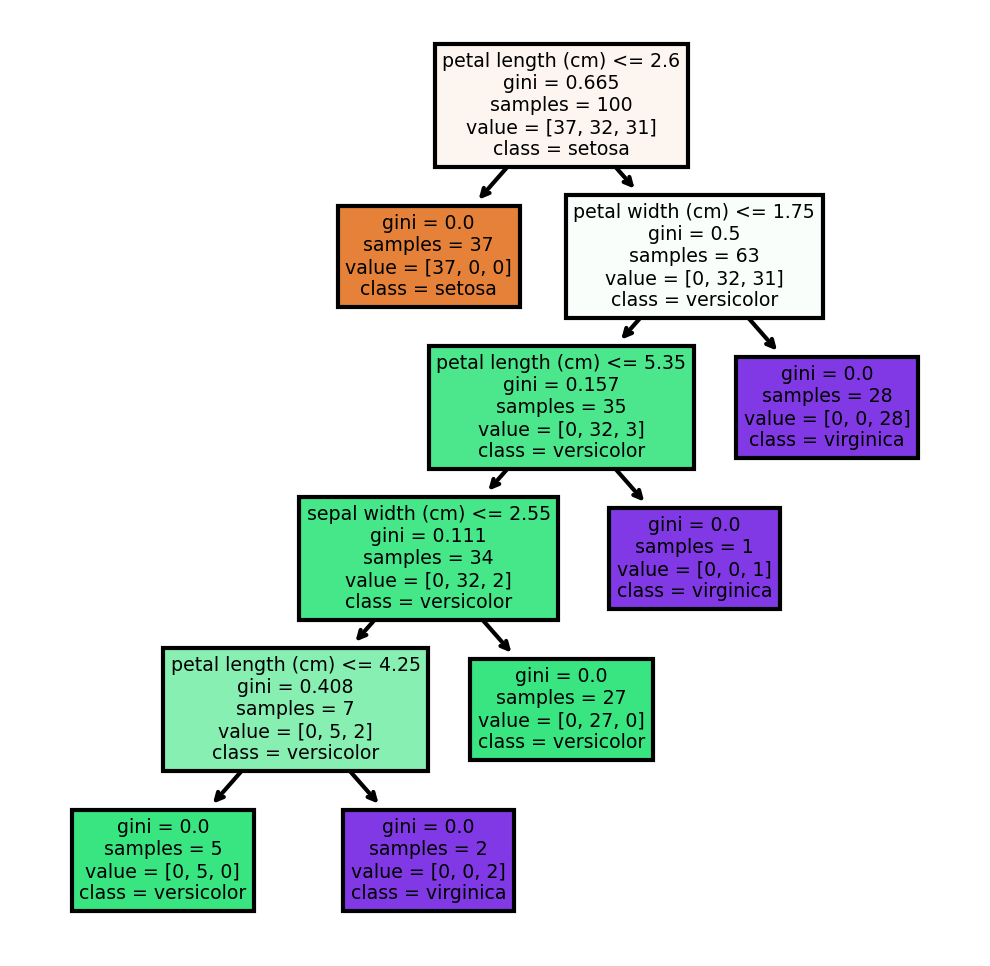

In [21]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(decision, feature_names = fn, class_names = cn, filled = True);

# Thank You!!!!